In [ ]:
import numpy as np
import math
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import  StandardScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import f1_score




In [ ]:
from google.colab import files
uploaded = files.upload()

Saving newData.csv to newData.csv


In [ ]:
df = pd.read_csv('newData.csv')

In [ ]:
df.size
df

,Area name,Departure time,Arrive time,Duration time,Latitude,Longitude
0,Dhanmondi,8:00 AM,5:30 PM,9:30:00,23.746053,90.376219
1,Dhanmondi,9:00 AM,5:00 PM,8:00:00,23.746214,90.376522
2,Gulshan,9:00 AM,7:30 PM,10:30:00,23.792964,90.404443
3,Dhanmondi,9:00 AM,8:30 PM,11:30:00,23.749457,90.375497
4,Gulshan,10:00 AM,6:00 PM,8:00:00,23.805708,90.418652
...,...,...,...,...,...,...
394,Mohammadpur,8:15 AM,8:00 PM,NaN,23.769499,90.354714
395,Mohammadpur,9:00 AM,5:00 PM,NaN,23.769524,90.354853
396,Mohammadpur,11:00 AM,2:00 PM,NaN,23.769343,90.354928
397,Mohammadpur,6:00 PM,3:00 PM,NaN,23.769339,90.354783


In [ ]:
df['Area name'] = df['Area name'].astype('category').cat.codes

In [ ]:
df['Arrive time '] = df['Arrive time '].astype('category').cat.codes

In [ ]:
df['Departure time'] = df['Departure time'].astype('category').cat.codes

In [ ]:
del df['Duration time']

In [ ]:
cols = list(df)[0:5]
#nparray = np.array(df)[:,1:3]



In [ ]:
df_for_training = df[cols].astype(float)

In [ ]:
df_for_training

,Area name,Departure time,Arrive time,Latitude,Longitude
0,0.0,22.0,16.0,23.746053,90.376219
1,0.0,29.0,13.0,23.746214,90.376522
2,1.0,29.0,20.0,23.792964,90.404443
3,0.0,29.0,23.0,23.749457,90.375497
4,1.0,0.0,17.0,23.805708,90.418652
...,...,...,...,...,...
394,4.0,25.0,22.0,23.769499,90.354714
395,4.0,29.0,13.0,23.769524,90.354853
396,4.0,4.0,8.0,23.769343,90.354928
397,4.0,13.0,9.0,23.769339,90.354783


In [ ]:
kmeans = KMeans(n_clusters=7)

In [ ]:
#centers = kmeans.cluster_centers_
y_pred = kmeans.fit_predict(df_for_training[['Latitude ','Longitude']])
y_pred

array([0, 0, 5, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 1, 1, 5, 5, 5, 5, 5, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 5, 5, 5, 5, 5, 1, 1, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 5, 5, 5,
       5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1,

In [ ]:
df_for_training['cluster'] = y_pred
df_for_training.head()

,Area name,Departure time,Arrive time,Latitude,Longitude,cluster
0,0.0,22.0,16.0,23.746053,90.376219,0
1,0.0,29.0,13.0,23.746214,90.376522,0
2,1.0,29.0,20.0,23.792964,90.404443,5
3,0.0,29.0,23.0,23.749457,90.375497,0
4,1.0,0.0,17.0,23.805708,90.418652,1


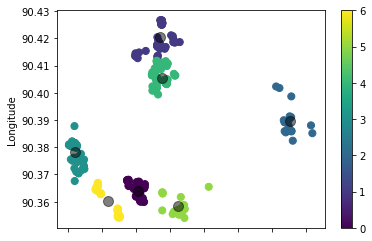

In [ ]:
df_for_training.plot.scatter(x= 'Latitude ', y= 'Longitude', c=y_pred, s=50, cmap='viridis' )
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)


In [ ]:
train_DATA = []
errorRMSE = []
errorMAE = []
auc = []

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 128)            67072     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 2)                 130       
                                                                 
Total params: 116,610
Trainable params: 116,610
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
3/3 [==============================] - 6s 171ms/step - loss: 0.6006 - val_loss: 0.1307
Epoch 2/100
3/3 [==============================] - 0s 28ms/step - loss: 0.3307 - val_loss: 0.0648
Epoch 3/100
3/3 [==============================] - 0s 24ms/step - loss: 0.1708 - val_loss: 0.0438
Epoch 4/100
3/3 [==============================] - 0s 24ms/step - loss: 0.1501 - val_loss: 0.0332
Epoch 5/100
3/3 [==============================] - 0s 23ms/step - loss: 0.1003 - val_loss: 0.0436
Epoch 6/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0978 - val_loss: 0.0560
Epoch 7/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0797 - val_loss: 0.0475
Epoch 8/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0738 - val_loss: 0.0373
Epoch 9/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0743 - val_loss: 0.0349
Epoch 10/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0653 - val_loss: 0.0361
Epoch 11/100
3/3 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 2s 160ms/step - loss: 0.8716 - val_loss: 0.1374
Epoch 2/100
3/3 [==============================] - 0s 24ms/step - loss: 0.2947 - val_loss: 0.1296
Epoch 3/100
3/3 [==============================] - 0s 25ms/step - loss: 0.2840 - val_loss: 0.0994
Epoch 4/100
3/3 [==============================] - 0s 22ms/step - loss: 0.2215 - val_loss: 0.0806
Epoch 5/100
3/3 [==============================] - 0s 28ms/step - loss: 0.1725 - val_loss: 0.0867
Epoch 6/100
3/3 [==============================] - 0s 24ms/step - loss: 0.1490 - val_loss: 0.1034
Epoch 7/100
3/3 [==============================] - 0s 24ms/step - loss: 0.1506 - val_loss: 0.1126
Epoch 8/100
3/3 [==============================] - 0s 25ms/step - loss: 0.1366 - val_loss: 0.1129
Epoch 9/100
3/3 [==============================] - 0s 24ms/step - loss: 0.1239 - val_loss: 0.1123
Epoch 10/100
3/3 [==============================] - 0s 25ms/step - loss: 0.1179 - val_loss: 0.1101
Epoch 11/100
3/3 [============

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 2s 318ms/step - loss: 0.8500 - val_loss: 0.2466
Epoch 2/100
2/2 [==============================] - 0s 34ms/step - loss: 0.3332 - val_loss: 0.0453
Epoch 3/100
2/2 [==============================] - 0s 35ms/step - loss: 0.3896 - val_loss: 0.0298
Epoch 4/100
2/2 [==============================] - 0s 33ms/step - loss: 0.2688 - val_loss: 0.0429
Epoch 5/100
2/2 [==============================] - 0s 42ms/step - loss: 0.2129 - val_loss: 0.0693
Epoch 6/100
2/2 [==============================] - 0s 41ms/step - loss: 0.1696 - val_loss: 0.1057
Epoch 7/100
2/2 [==============================] - 0s 38ms/step - loss: 0.1371 - val_loss: 0.1245
Epoch 8/100
2/2 [==============================] - 0s 37ms/step - loss: 0.1173 - val_loss: 0.1210
Epoch 9/100
2/2 [==============================] - 0s 37ms/step - loss: 0.1185 - val_loss: 0.1073
Epoch 10/100
2/2 [==============================] - 0s 33ms/step - loss: 0.1272 - val_loss: 0.0942
Epoch 11/100
2/2 [============

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 2s 2s/step - loss: 1.1502 - val_loss: 0.0457
Epoch 2/100
1/1 [==============================] - 0s 42ms/step - loss: 0.7212 - val_loss: 0.0979
Epoch 3/100
1/1 [==============================] - 0s 42ms/step - loss: 0.6928 - val_loss: 0.0142
Epoch 4/100
1/1 [==============================] - 0s 36ms/step - loss: 0.1840 - val_loss: 0.0035
Epoch 5/100
1/1 [==============================] - 0s 36ms/step - loss: 0.2849 - val_loss: 0.0273
Epoch 6/100
1/1 [==============================] - 0s 38ms/step - loss: 0.3061 - val_loss: 0.0422
Epoch 7/100
1/1 [==============================] - 0s 58ms/step - loss: 0.2414 - val_loss: 0.0560
Epoch 8/100
1/1 [==============================] - 0s 44ms/step - loss: 0.2630 - val_loss: 0.0605
Epoch 9/100
1/1 [==============================] - 0s 40ms/step - loss: 0.1990 - val_loss: 0.0551
Epoch 10/100
1/1 [==============================] - 0s 48ms/step - loss: 0.2318 - val_loss: 0.0480
Epoch 11/100
1/1 [===============

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 2s 2s/step - loss: 0.8686 - val_loss: 0.2302
Epoch 2/100
1/1 [==============================] - 0s 53ms/step - loss: 0.7904 - val_loss: 0.8862
Epoch 3/100
1/1 [==============================] - 0s 42ms/step - loss: 2.6408 - val_loss: 0.3649
Epoch 4/100
1/1 [==============================] - 0s 37ms/step - loss: 1.8788 - val_loss: 0.1460
Epoch 5/100
1/1 [==============================] - 0s 40ms/step - loss: 0.5748 - val_loss: 0.2619
Epoch 6/100
1/1 [==============================] - 0s 38ms/step - loss: 0.4481 - val_loss: 0.4295
Epoch 7/100
1/1 [==============================] - 0s 38ms/step - loss: 0.5491 - val_loss: 0.5423
Epoch 8/100
1/1 [==============================] - 0s 40ms/step - loss: 0.3786 - val_loss: 0.5971
Epoch 9/100
1/1 [==============================] - 0s 44ms/step - loss: 0.5505 - val_loss: 0.6054
Epoch 10/100
1/1 [==============================] - 0s 37ms/step - loss: 0.3628 - val_loss: 0.5873
Epoch 11/100
1/1 [===============

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 2s 169ms/step - loss: 0.8721 - val_loss: 0.2743
Epoch 2/100
3/3 [==============================] - 0s 24ms/step - loss: 0.3391 - val_loss: 0.1613
Epoch 3/100
3/3 [==============================] - 0s 25ms/step - loss: 0.3104 - val_loss: 0.1331
Epoch 4/100
3/3 [==============================] - 0s 26ms/step - loss: 0.1978 - val_loss: 0.1379
Epoch 5/100
3/3 [==============================] - 0s 25ms/step - loss: 0.1561 - val_loss: 0.1470
Epoch 6/100
3/3 [==============================] - 0s 24ms/step - loss: 0.1321 - val_loss: 0.1547
Epoch 7/100
3/3 [==============================] - 0s 31ms/step - loss: 0.1253 - val_loss: 0.1616
Epoch 8/100
3/3 [==============================] - 0s 30ms/step - loss: 0.1196 - val_loss: 0.1591
Epoch 9/100
3/3 [==============================] - 0s 40ms/step - loss: 0.1166 - val_loss: 0.1550
Epoch 10/100
3/3 [==============================] - 0s 32ms/step - loss: 0.1145 - val_loss: 0.1483
Epoch 11/100
3/3 [============

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 2s 167ms/step - loss: 0.6590 - val_loss: 0.0626
Epoch 2/100
3/3 [==============================] - 0s 28ms/step - loss: 0.3054 - val_loss: 0.3538
Epoch 3/100
3/3 [==============================] - 0s 23ms/step - loss: 0.2855 - val_loss: 0.3369
Epoch 4/100
3/3 [==============================] - 0s 27ms/step - loss: 0.2369 - val_loss: 0.1547
Epoch 5/100
3/3 [==============================] - 0s 25ms/step - loss: 0.1473 - val_loss: 0.0816
Epoch 6/100
3/3 [==============================] - 0s 24ms/step - loss: 0.1634 - val_loss: 0.0658
Epoch 7/100
3/3 [==============================] - 0s 29ms/step - loss: 0.1166 - val_loss: 0.0717
Epoch 8/100
3/3 [==============================] - 0s 24ms/step - loss: 0.1104 - val_loss: 0.0810
Epoch 9/100
3/3 [==============================] - 0s 26ms/step - loss: 0.1084 - val_loss: 0.0923
Epoch 10/100
3/3 [==============================] - 0s 24ms/step - loss: 0.1152 - val_loss: 0.1088
Epoch 11/100
3/3 [============

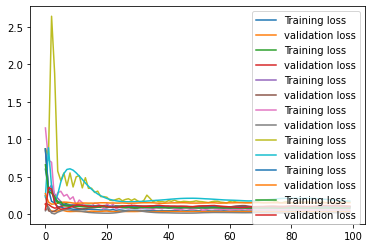

In [ ]:
for i in range(7):
  train_DATA.insert(i, df_for_training[df_for_training.cluster==i])

  cols = list(train_DATA[i])[1:3]
  train_DATA[i] = train_DATA[i][cols]

  scaler= MinMaxScaler(feature_range=(0,1))
  train_DATA[i]= scaler.fit_transform(np.array(train_DATA[i]))

  train_size = int(len(train_DATA[i])*0.65)
  test_size = len(train_DATA[i])-train_size
  traindata, testdata = train_DATA[i][0:train_size,:], train_DATA[i][0:test_size,:]

  trainX = []
  trainY = []
  testX = []
  testY = []

  n_future = 1
  n_past = 3

  for j in range(3, len(traindata) - n_future + 1):
    trainX.append(traindata[j - n_past:j, 0:traindata.shape[1]])
    trainY.append(traindata[j + n_future - 1:j + n_future, 0:testdata.shape[1]])

  for j in range(3, len(testdata) - n_future + 1):
    testX.append(testdata[j - n_past:j, 0:testdata.shape[1]])
    testY.append(testdata[j + n_future - 1:j + n_future, 0:testdata.shape[1]])

  trainX, trainY = np.array(trainX), np.array(trainY)
  testX, testY = np.array(testX), np.array(testY)

  model = Sequential()
  model.add(LSTM(128, activation='sigmoid', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences = True))
  model.add(LSTM(64, activation= 'sigmoid', return_sequences= False))
  model.add(Dropout(0.7))
  model.add(Dense(trainY.shape[2]))



  model.compile(optimizer= keras.optimizers.Adam(lr=0.01), loss='mse')
  model.summary()

  history = model.fit(trainX, trainY, epochs= 100, batch_size=16, validation_split = 0.1, verbose=1)

  plt.plot(history.history['loss'], label = 'Training loss')
  plt.plot(history.history['val_loss'], label = 'validation loss')
  plt.legend()

  train_predict = model.predict(trainX)
  test_predict = model.predict(testX)

  #train_predict =scaler.inverse_transform(train_predict)
  #test_predict =scaler.inverse_transform(test_predict)

  trainYreshape = np.reshape(trainY,(train_size-3,2))
  testYreshape = np.reshape(testY,(test_size-3,2))

  #testYreshape_inverse = scaler.inverse_transform(testYreshape)

  #error = math.sqrt(mean_squared_error(testYreshape_inverse,test_predict))

  errorRMSE.insert(i, math.sqrt(mean_squared_error(testYreshape,test_predict)))
  errorMAE.insert(i,mae(testYreshape,test_predict))






In [ ]:
errorRMSE

[0.29700362449084355,
 0.31350545793983664,
 0.19560652720747485,
 0.4434208229281751,
 0.2850126676561669,
 0.22490179621634931,
 0.30874923486792716]

In [ ]:
errorMAE

[0.25027966016990755,
 0.24664945446926614,
 0.15246314372939448,
 0.4042654623587926,
 0.2305248933997783,
 0.18668642226192686,
 0.26571733506038936]

In [ ]:
error_avgRMSE = sum(errorRMSE)/len(errorRMSE)
error_avgRMSE

0.29545716161525337

In [ ]:
error_avgMAE = sum(errorMAE)/len(errorMAE)
error_avgMAE

0.24808376734992219

In [ ]:
#df_for_training1= df_for_training[df_for_training.cluster==0]
#df_for_training2= df_for_training[df_for_training.cluster==1]
#df_for_training3= df_for_training[df_for_training.cluster==2]
#df_for_training4= df_for_training[df_for_training.cluster==3]
#df_for_training5= df_for_training[df_for_training.cluster==4]
#df_for_training6= df_for_training[df_for_training.cluster==5]
#df_for_training7= df_for_training[df_for_training.cluster==6]

In [ ]:
#cols = list(df_for_training4)[1:3]
#df_for_training4 = df_for_training4[cols]

In [ ]:
#scaler = StandardScaler()
#scaler = scaler.fit(df_for_training4)
#df_for_training_scaled4 = scaler.transform(df_for_training4)

#from sklearn.preprocessing import MinMaxScaler
#scaler= MinMaxScaler(feature_range=(0,1))
#df_for_training_scaled4= scaler.fit_transform(np.array(df_for_training_scaled4))



In [ ]:
#train_size = int(len(df_for_training_scaled4)*0.65)
#test_size = len(df_for_training_scaled4)-train_size
#traindata, testdata = df_for_training_scaled4[0:train_size,:], df_for_training_scaled4[0:test_size,:]
#train_size, test_size

(1109, 598)

In [ ]:
#trainX = []
#trainY = []
#testX = []
#testY = []

In [ ]:
#n_future = 1
#n_past = 3

In [ ]:
#for i in range(n_past, len(traindata) - n_future + 1):
#  trainX.append(traindata[i - n_past:i, 0:traindata.shape[1]])
#  trainY.append(traindata[i + n_future - 1:i + n_future, 0:testdata.shape[1]])

In [ ]:
#for i in range(n_past, len(testdata) - n_future + 1):
#  testX.append(testdata[i - n_past:i, 0:testdata.shape[1]])
#  testY.append(testdata[i + n_future - 1:i + n_future, 0:testdata.shape[1]])

In [ ]:
#trainX, trainY = np.array(trainX), np.array(trainY)

In [ ]:
#testX, testY = np.array(testX), np.array(testY)

In [ ]:
#trainX, trainY


In [ ]:
#trainY[:10]

In [ ]:
#testX[:10]

In [ ]:
#testY[:10]

In [ ]:
#print('trainX shape == {}.'.format(trainX.shape))
#print('trainY shape == {}.'.format(trainY.shape))
#trainX.shape[1], trainX.shape[2]

In [ ]:
#model = Sequential()
#model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences = True))
#model.add(LSTM(32, activation= 'relu', return_sequences= False))
#model.add(Dropout(0.7))
#model.add(Dense(trainY.shape[2]))




In [ ]:
#model.compile(optimizer= 'adam', loss= 'mse')
#model.summary()

In [ ]:
#history = model.fit(trainX, trainY, epochs= 100, batch_size=64, validation_split = 0.1, verbose=1)

In [ ]:
#plt.plot(history.history['loss'], label = 'Training loss')
#plt.plot(history.history['val_loss'], label = 'validation loss')
#plt.legend()

In [ ]:
#train_predict = model.predict(trainX)
#test_predict = model.predict(testX)

#trainX.shape, testX.shape, trainY.shape, testY.shape

In [ ]:
#train_predict

In [ ]:
#trainX

In [ ]:
#train_predict =scaler.inverse_transform(train_predict)
#test_predict =scaler.inverse_transform(test_predict)

In [ ]:
#train_predict.shape, trainY.shape

In [ ]:
#trainYreshape = np.reshape(trainY,(1106,2))
#testYreshape = np.reshape(testY,(595,2))


In [ ]:
#import math
#from sklearn.metrics import mean_squared_error
#math.sqrt(mean_squared_error(trainYreshape,train_predict))
#mean_squared_error(trainYreshape,train_predict)

In [ ]:
#math.sqrt(mean_squared_error(testYreshape,test_predict))